In [0]:
import cv2

import pyspark.sql.functions as f
from pyspark.sql.types import *

import numpy as npa
import copy
import pandas as pd
import random

In [0]:
%run ../Transfer/_lib/_models/base_autoencoder

['2.8.0', [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]]

In [0]:
%run ../Transfer/_data/model_data

In [0]:
%run ../Transfer/_lib/plotter

## Import Data
### Model Data Initialization
The class `ModelData` is responsible for:
1. Reading the database tables that resulted from the data processing pipeline
2. Joining the different heatmaps so that a play has many heatmaps per row/sample
3. Splitting the entire dataset into train and test sets
4. Caching the train and test data to seperate temporary tables

### Get Dataset Method
This is used to take samples from the cached train and test datasets
1. To Prevent to much data being loaded in to VRAM per training period
2. To allow samples to be drawn from separate workers when using Horovod (Distributed Training)

### Result

Four data objects are produced:
1. `X_train` - Training Data Dictionary - Each key is a image type (eg. position, dx, dy, ball) and the value is a n by (,28,28,1) matrix
2. `X_train_labels` - Training Labels Pandas DataFrame - Labels associated with each play, per row of a data frame, n by (label-count [columns])
1. `Y_train` - Testing Data Dictionary - Each key is a image type (eg. position, dx, dy, ball) and the value is a n by (,28,28,1) matrix
1. `Y_train_labels` - Testing Labels Pandas DataFrame - Labels associated with each play, per row of a data frame, n by (label-count [columns])

In [0]:

# This Model data, will
# 1) read in the "heatmaps per player per frame" from tracking data.

run_name = '0620'

#MATCH TO HEATMAPS OUTPUT: below should match that chosen from Generate Heatmaps notebook so can find heatmaps
additional_label = '0620'

#Below doesn't matter as much, can make unique name for yourself
experiment_name = "full_results" + run_name

v2 = True
expbh = False
quick_run = False
chiral = False
#chiral_list = make_chiral_list(forced_test_list)
building_model_data = True

if building_model_data:
  model_data = ModelData(experiment_name, 
                        image_size=vgg_basic_architecture.stimulus_size[:2], new_dividers=True, flat=False, quick_run = quick_run, forced_test_list = None, v2 = v2, additional_label = additional_label, expbh = expbh, chiral = chiral)


v2 turned on: True
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
teamId|startWcTime|endWcTime|startGcTime|endGcTime|period|gameId|possId|dividerId|outcome|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+

+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
teamId|startWcTime|endWcTime|startGcTime|endGcTime|period|gameId|possId|dividerId|outcome|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+

SCALING COURT for: position
position [Original Scale]: 0.0 -- 417.0
position [Scaled]: 0.0 -- 1.0
Base Table done...
Creating heatmap from new_play_v2_velocitymaps_0620, for variable v2
% of missing velocity maps:0.0
% of missing velocity maps after filling:0.0
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
teamId|startWcTime|endWcTime|startGcTime|endGcTime|period|gameId|possId|dividerId|outcome|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+

+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
teamId|startWcTime|endWcTime|startGcTime|endGcTime|period|gameId|possId|dividerId|outcome|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+

SCALING COURT for: v2
v2 [Original Scale]: 0.0 -- 977.0
v2 [Scaled]: 0.0 -- 1.0
Table: new_play_v2_velocitymaps_0620 done...
Creating heatmap from new_play_v2_positionball_0620, for variable ball
% of missing velocity maps:0.0
% of missing velocity maps after filling:0.0
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
teamId|startWcTime|endWcTime|startGcTime|endGcTime|period|gameId|possId|dividerId|outcome|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+

+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
teamId|startWcTime|endWcTime|startGcTime|endGcTime|period|gameId|possId|dividerId|outcome|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+------+-----------+---------+-----------+---------+------+------+------+---------+-------+

SCALING COURT for: ball
ball [Original Scale]: 0.0 -- 1760.0
ball [Scaled]: 0.0 -- 1.0
Table: new_play_v2_positionball_0620 done...
# of train columns {} 20
# of test columns {} 20
train columns {} ['gameId', 'teamId', 'possId', 'dividerId', 'startWcTime', 'endWcTime', 'startGcTime', 'endGcTime', 'period', 'StartDivider', 'EndDivider', 'outcome', 'hasPoss', 'basketX', 'fta', 'position', 'v2', 'ball', 'StartDividerOH', 'EndDividerOH']
test columns {} ['gameId', 'teamId', 'possId', 'dividerId', 'startWcTime', 'endWcTime', 'startGcTime', 'endGcTime', 'period', 'StartDivider', 'EndDivider', 'outcome', 'hasPoss', 'basketX', 'fta', 'position', 'v2', 'ball', 'StartDividerOH', 'EndDividerOH']

In [0]:
#The following splits the code into to 1) if you've just built the model_data in the step above (i.e. building_model_data = True), versus 2) if you are pulling in previous train and test sets.  
# TODO FOR MRINAL: This is extremely redudant.  The functions should be refactored to take either way, instead of having copies of the functions from the class spelled out here. Ideally, the model_data class would just be loaded from before.  But if not, can set these functions up so that we don't have the same functions written twice.  Perhaps pull the functions out of the model_data class, and just have the model_data class USE those functions, with a flag for whether you're in load mode (and don't have acces to self (ModelData) or you have just built the model_data.


if building_model_data:
  (X_train, X_train_labels), (X_test, X_test_labels) = model_data.get_dataset()
else:
  
  
  #Everything in this 'else' is the hacky way to get what we need from previously written train and test tables
  #This is often the faster way to progress -- because building model_data is time consuming -- if the model_data has already been built before (and thus test and train tables written out)
  #This is a work around for not having the ability to save and load "model_data".

  maps = {}

  maps['team_name_mapping_dict'] = \
  {
    x.nbaId: x.name for x in 
      spark.sql("SELECT * FROM mappings.teams")
           .select(["nbaId", "name"])
           .collect()
   }

  maps['team_mapping_id_dict'] = \
  { 
    x.id: x.nbaId for x in 
      spark.sql("SELECT * FROM mappings.teams")
           .select(["nbaId", "id"])
           .collect()
  }

  maps['game_mapping_dict'] = \
  { 
    x.gameId: [maps['team_mapping_id_dict'][x.homeTeamId], maps['team_mapping_id_dict'][x.awayTeamId]] for x in 
      spark.sql("SELECT * FROM mappings.games")
           .select([f.col("nbaId").alias("gameId"), "homeTeamId", "awayTeamId"])
           .collect()
  }



  v2 = True
  if v2:
    print(f'v2 turned on: {v2}')
    base_table_name = ("new_play_v2_positionmaps" + additional_label, "position")
    table_names = {"new_play_v2_velocitymaps" + additional_label: "v2", 
                        "new_play_v2_positionball" + additional_label: "ball"}

  else: 
      base_table_name = ("new_play_positionmaps" + additional_label, "position")
      table_names = {"new_play_velocitymaps_dx" + additional_label: "dx", 
                          "new_play_velocitymaps_dy" + additional_label: "dy", 
                            "new_play_positionball" + additional_label: "ball"}

  col_names = [base_table_name[1]] + list(table_names.values())
  
  
  def resize_courts(df_heatmaps_pandas, col_name, already_reoriented = False):
      
    #This thing basically cuts the court in half, and spins it around so all offensive courts are oriented in the same way. 
    #Again, this is coded in an obtuse way, and should be refactored to be human readable.

    #we'll need a new option in here for velocity phase space maps, to be warped to fit the same image, instead of just cut in half.  
    #this could be done up where v2 velocity gets scaled.  We could just fit it to image size right then.
    image_size = (28,28)
    
    print(f"resizing for {col_name}")
    X = np.array(df_heatmaps_pandas[col_name].apply(lambda x: x.reshape(101,51)).tolist())
    print(X.shape)
    basketX = list(df_heatmaps_pandas["basketX"])
    
    
    # Starting with a column chosed from e.g. ['position', 'v2', 'ball]
    # [gameId-dividerId index, x_grid bin, y grid bin]
    # And then we'll need to only pick the half court we are interested in.
    # if we've previously reoriented by basketX in the heatmaps notebook, then this is simple.
    # (note v2 is different check out note above)
    Xi = np.zeros([X.shape[0], 51, 51])
    for c in range(X.shape[0]):
      xi = X[c,:,:]
      
      if already_reoriented:
        if col_name == 'v2':
          Xi[c,:,:] = xi[25:76,:]
            
        else:
          Xi[c,:,:] = xi[50:,:]
        
        
      else:
        if col_name == 'v2':
          #print("Different cut used for v2")
          if basketX[c] < 0:
            Xi[c,:,:] = xi[25:76,:]
          #TODO: BELOW IS WRONG Original error: pretty sure the below is a relfection for x coordinate, and not a rotation about z axis
          #still using it because of memory errors with the solution
          else:
            Xi[c,:,:] = xi[25:76,:][::-1]
          # THE BELOW IS CORRECT
  #         else:
  #           print('New Rotation')
  #           Xi[c,:,:] = np.array([x[::-1] for x in xi[25:76,:][::-1]])

        else:
          #print("Position cut used for {}".format(col_name))
          if basketX[c] < 0:
            Xi[c,:,:] = xi[:51,:]
          #TODO: BELOW IS WRONG Original error: pretty sure the below is a relfection for x coordinate, and not a rotation about z axis
          else:
            Xi[c,:,:] = xi[50:,:][::-1]
          #The Below is correct
          #else:
            #print('New Rotation')
            #Xi[c,:,:] = np.array([x[::-1] for x in xi[50:,:][::-1]])

    X_small = np.zeros([Xi.shape[0], *image_size, 1])

    for k in range(Xi.shape[0]):
      X_small[k,:,:,0] = cv2.resize(Xi[k,:,:], image_size)
      X_small[k,:,:,0] = X_small[k,:,:,0]/X_small[k,:,:,0].max()
      

    feature_columns = ["gameId", "dividerId", "teamId", "startWcTime", "endWcTime", "startGcTime", "endGcTime", "period"]
      
    return X_small, df_heatmaps_pandas[ feature_columns ]

  
  
  sample = False
  if sample:
    df_train_pandas = ( spark.sql(f"SELECT * FROM default.{experiment_name}_train")\
                               .sample(0.4, seed=0).toPandas() )
    df_test_pandas = ( spark.sql(f"SELECT * FROM default.{experiment_name}_test")\
                               .sample(0.4, seed=0).toPandas() )
  else:
    df_train_pandas = ( spark.sql(f"SELECT * FROM default.{experiment_name}_train").toPandas())
                            
    df_test_pandas = ( spark.sql(f"SELECT * FROM default.{experiment_name}_test").toPandas())
                         



  X_train = {}
  X_test = {}

  image_size = (28,28)
  flat = True

  print("Inside get_dataset, col_names {}".format(col_names))
  for col_name in col_names:
    print("Inside get_dataset, working on {}".format(col_name))
    X_train[col_name], X_train_labels = resize_courts(df_train_pandas, col_name, already_reoriented = True)
    X_test[col_name], X_test_labels = resize_courts(df_test_pandas, col_name, already_reoriented = True)

  sample_data = SampleDataSet(X_train, X_train_labels, X_test, X_test_labels, maps, col_names, building_model_data = building_model_data)


Inside get_dataset, self.col_names ['position', 'v2', 'ball']
Inside get_dataset, working on position
resizing for position
(2264, 101, 51)
<command-4125874324571724>:550: RuntimeWarning: invalid value encountered in true_divide
 X_small[k,:,:,0] = X_small[k,:,:,0]/X_small[k,:,:,0].max()
resizing for position
(968, 101, 51)
Inside get_dataset, working on v2
resizing for v2
(2264, 101, 51)
resizing for v2
(968, 101, 51)
Inside get_dataset, working on ball
resizing for ball
(2264, 101, 51)
resizing for ball
(968, 101, 51)

<command-4125874324571723>:72: UserWarning: registration of accessor <class '__main__.GameLabels'> under name 'GameLabels' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
 class GameLabels:

In [0]:
# df_train_pandas = ( spark.sql(f"SELECT * FROM default.{experiment_name}_train").toPandas())
# df_test_pandas = ( spark.sql(f"SELECT * FROM default.{experiment_name}_test").toPandas())

In [0]:
latent_dim = 16

if building_model_data:
  vae_vgg_vae_var_single = AE(vgg_basic_architecture, experiment_name, model_data.col_names, latent_dim,
                             hvd_flag=False, variational=True)
else:
  vae_vgg_vae_var_single = AE(vgg_basic_architecture, experiment_name, col_names, latent_dim,    
                            hvd_flag=False, variational=True)
  
vae_vgg_vae_var_single.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 vae_encoder_inputs_image_2z1t [(None, 28, 28, 1)] 0 [] 
 (InputLayer) 
 
 vae_encoder_inputs_image_H0fX [(None, 28, 28, 1)] 0 [] 
 (InputLayer) 
 
 vae_encoder_inputs_image_ez2z [(None, 28, 28, 1)] 0 [] 
 (InputLayer) 
 
 conv2d (Conv2D) (None, 28, 28, 16) 160 ['vae_encoder_inputs_image_2z1t[0
 ][0]'] 
 
 conv2d_3 (Conv2D) (None, 28, 28, 16) 160 ['vae_encoder_inputs_image_H0fX[0
 ][0]'] 
 
 conv2d_6 (Conv2D) (None, 28, 28, 16) 160 ['vae_encoder_inputs_image_ez2z[0
 ][0]'] 
 
 max_pooling2d (MaxPooling2D) (None, 14, 14, 16) 0 ['conv2d[0][0]'] 
 
 max_pooling2d_3 (MaxPooling2D) (None, 14, 14, 16) 0 ['conv2d_3[0][0]'] 
 
 max_pooling2d_6 (MaxPooling2D) (None, 14, 14, 16) 0 ['conv2d_6[0][0]'] 
 
 conv2d_1 (Conv2D) (None, 14, 14, 8) 1160 ['max_pooling2d[0][0]'] 
 
 conv2d_4 (Conv2D) (None, 14, 14, 8) 1160 ['max_pooling2d_3[0][0]'] 
 
 conv2d_7 (Conv2D) (None, 14, 14, 8) 1160 ['max_pooling2d_6[0][0]'] 
 
 max_pooling2d_1 (MaxPooling2D) (None, 7, 7, 8) 0 ['conv2d_1[0][0]'] 
 
 max_pooling2d_4 (MaxPooling2D) (None, 7, 7, 8) 0 ['conv2d_4[0][0]'] 
 
 max_pooling2d_7 (MaxPooling2D) (None, 7, 7, 8) 0 ['conv2d_7[0][0]'] 
 
 conv2d_2 (Conv2D) (None, 7, 7, 8) 584 ['max_pooling2d_1[0][0]'] 
 
 conv2d_5 (Conv2D) (None, 7, 7, 8) 584 ['max_pooling2d_4[0][0]'] 
 
 conv2d_8 (Conv2D) (None, 7, 7, 8) 584 ['max_pooling2d_7[0][0]'] 
 
 max_pooling2d_2 (MaxPooling2D) (None, 4, 4, 8) 0 ['conv2d_2[0][0]'] 
 
 max_pooling2d_5 (MaxPooling2D) (None, 4, 4, 8) 0 ['conv2d_5[0][0]'] 
 
 max_pooling2d_8 (MaxPooling2D) (None, 4, 4, 8) 0 ['conv2d_8[0][0]'] 
 
 flatten (Flatten) (None, 128) 0 ['max_pooling2d_2[0][0]'] 
 
 flatten_1 (Flatten) (None, 128) 0 ['max_pooling2d_5[0][0]'] 
 
 flatten_2 (Flatten) (None, 128) 0 ['max_pooling2d_8[0][0]'] 
 
 concatenate (Concatenate) (None, 384) 0 ['flatten[0][0]', 
 'flatten_1[0][0]', 
 'flatten_2[0][0]'] 
 
 dense_2 (Dense) (None, 16) 6160 ['concatenate[0][0]'] 
 
 dense_3 (Dense) (None, 16) 6160 ['concatenate[0][0]'] 
 
 lambda_1 (Lambda) (None, 16) 0 ['dense_2[0][0]', 
 'dense_3[0][0]'] 
 
 model_2 (Functional) (None, 28, 28, 1) 4657 ['lambda_1[0][0]'] 
 
 model_3 (Functional) (None, 28, 28, 1) 4657 ['lambda_1[0][0]'] 
 
 model_4 (Functional) (None, 28, 28, 1) 4657 ['lambda_1[0][0]'] 
 
 tf.cast (TFOpLambda) (3, None, 28, 28, 1 0 ['vae_encoder_inputs_image_2z1t[0
 ) ][0]', 
 'vae_encoder_inputs_image_H0fX[0
 ][0]', 
 'vae_encoder_inputs_image_ez2z[0
 ][0]'] 
 
 tf.convert_to_tensor (TFOpLamb (3, None, 28, 28, 1 0 ['model_2[0][0]', 
 da) ) 'model_3[0][0]', 
 'model_4[0][0]'] 
 
 tf.__operators__.add (TFOpLamb (None, 16) 0 ['dense_3[0][0]'] 
 da) 
 
 tf.math.square (TFOpLambda) (None, 16) 0 ['dense_2[0][0]'] 
 
 tf.keras.backend.binary_crosse (3, None, 28, 28, 1 0 ['tf.cast[0][0]', 
 ntropy (TFOpLambda) ) 'tf.convert_to_tensor[0][0]'] 
 
 tf.math.subtract (TFOpLambda) (None, 16) 0 ['tf.__operators__.add[0][0]', 
 'tf.math.square[0][0]'] 
 
 tf.math.exp (TFOpLambda) (None, 16) 0 ['dense_3[0][0]'] 
 
 tf.math.reduce_mean (TFOpLambd (3, None, 28, 28) 0 ['tf.keras.backend.binary_crossen
 a) tropy[0][0]'] 
 
 tf.math.subtract_1 (TFOpLambda (None, 16) 0 ['tf.math.subtract[0][0]', 
 ) 'tf.math.exp[0][0]'] 
 
 tf.math.reduce_sum (TFOpLambda (3, None, 28) 0 ['tf.math.reduce_mean[0][0]'] 
 ) 
 
 tf.math.reduce_sum_2 (TFOpLamb (None,) 0 ['tf.math.subtract_1[0][0]'] 
 da) 
 
 tf.math.reduce_sum_1 (TFOpLamb (3, None) 0 ['tf.math.reduce_sum[0][0]'] 
 da) 
 
 tf.math.multiply (TFOpLambda) (None,) 0 ['tf.math.reduce_sum_2[0][0]'] 
 
 tf.__operators__.add_1 (TFOpLa (3, None) 0 ['tf.math.reduce_sum_1[0][0]', 
 mbda) 'tf.math.multiply[0][0]'] 
 
 tf.math.reduce_mean_1 (TFOpLam () 0 ['tf.__operators__.add_1[0][0]'] 
 bda) 
 
 add_loss (AddLoss) () 0 ['tf.math.reduce_mean_1[0][0]'] 
 

In [0]:
vae_vgg_vae_var_single.save_model()

SAVING: vgg_basic_1Cov

In [0]:
%sh

ls -ltr /dbfs/FileStore/gb-cache/models/test_demo_experiment/

ls: cannot access '/dbfs/FileStore/gb-cache/models/test_demo_experiment/': No such file or directory

## Model Training

The purpose of is to find a trade of between reconstruction accuracy and a compressed representation of the input data - with greater compression coming from redcuding the number of nodes in the smallest layer - the latent space. We specify this with the parameter `latent_dim` and at the time of writing it was set to 4.

The reconstruction accuracy is the difference between the image, or images, that are used as input to the network and the images that are produced from the network. In our current network there are 4 images per sample: the position of the team `position`, the lateral speed of the team `dx`, the logditudinal speed of the team `dy`, and position of the ball `ball`.

These images are retreived from the database using the `ModelData` class. Within this object they are stored within the attribute `.sampledata` and leverage the `SampleDataSet` class. This stores the data in separate Trian and Test sets - under `.X_train` and `X_test`. These use the `SampleData` class and behave like a dictionary with extra custom features - so you can access the data using KEYS, eg.

```python
model_data.sample_data.X_train.keys()                    # --> RETURNS dict_keys(['position', 'dx', 'dy', 'ball'])
```

```python
model_data.sample_data.X_train['position']               # --> RETURNS and np.ndarray
model_data.sample_data.X_train['position'].shape         # --> RETURNS (67868, 28, 28, 1)
```

The last operation shows that there are 67868 training examples and that each example is an image of size (28, 28, 1). The 28 by 28 image size is dependent on the architecture of the model. With more layers and more pooling operations then the size of the image is increased to account for the loss pixels through the encoder. For example, in the `./models/architectures` notebook the `vgg_A_11_...` architecture requires images of the size 28 by 28 with 3 pooling layers; however the larger `vgg_A_19` with 4 pooling layers requires an image of the size 56 by 56.

In [0]:
test_epochs = 100

if building_model_data:
  x_train = model_data.sample_data.X_train.get_data_as_list()
  y_train = model_data.sample_data.X_train.get_data_as_list()
else:
  # #if import with lost model_data
  x_train = sample_data.X_train.get_data_as_list()
  y_train = sample_data.X_train.get_data_as_list()

In [0]:
if v2:
  dx = list(set(np.where(np.isnan(x_train[0].reshape(x_train[0].shape[0], 28*28)).sum(axis=1) == 0)[0].tolist()) & 
  set(np.where(np.isnan(x_train[1].reshape(x_train[1].shape[0], 28*28)).sum(axis=1) == 0)[0].tolist()) & 
  set(np.where(np.isnan(x_train[2].reshape(x_train[2].shape[0], 28*28)).sum(axis=1) == 0)[0].tolist()))
  
else:
  dx = list(set(np.where(np.isnan(x_train[0].reshape(x_train[0].shape[0], 28*28)).sum(axis=1) == 0)[0].tolist()) & 
  set(np.where(np.isnan(x_train[1].reshape(x_train[1].shape[0], 28*28)).sum(axis=1) == 0)[0].tolist()) & 
  set(np.where(np.isnan(x_train[2].reshape(x_train[2].shape[0], 28*28)).sum(axis=1) == 0)[0].tolist()) &
  set(np.where(np.isnan(x_train[3].reshape(x_train[3].shape[0], 28*28)).sum(axis=1) == 0)[0].tolist()))


x_train = [ x[dx] for x in x_train]
y_train = [ x[dx] for x in y_train]

# THIS IS THE FIT
vae_vgg_vae_var_single.fit(x_train, y_train, validation_split = 0.2, epochs=test_epochs)

Epoch 1/100
 1/57 [..............................] - ETA: 2:44 - loss: 546.3923 - model_2_accuracy: 0.0794 - model_3_accuracy: 0.1416 - model_4_accuracy: 0.4734 5/57 [=>............................] - ETA: 0s - loss: 540.1879 - model_2_accuracy: 0.4983 - model_3_accuracy: 0.5465 - model_4_accuracy: 0.8171  9/57 [===>..........................] - ETA: 0s - loss: 532.0638 - model_2_accuracy: 0.6554 - model_3_accuracy: 0.6624 - model_4_accuracy: 0.876313/57 [=====>........................] - ETA: 0s - loss: 516.7114 - model_2_accuracy: 0.7116 - model_3_accuracy: 0.7072 - model_4_accuracy: 0.898617/57 [=======>......................] - ETA: 0s - loss: 486.1837 - model_2_accuracy: 0.7461 - model_3_accuracy: 0.7330 - model_4_accuracy: 0.912121/57 [==========>...................] - ETA: 0s - loss: 439.4126 - model_2_accuracy: 0.7685 - model_3_accuracy: 0.7487 - model_4_accuracy: 0.920325/57 [============>.................] - ETA: 0s - loss: 400.4366 - model_2_accuracy: 0.7841 - model_3_accuracy: 0.7594 - model_4_accuracy: 0.925629/57 [==============>...............] - ETA: 0s - loss: 374.8840 - model_2_accuracy: 0.7910 - model_3_accuracy: 0.7654 - model_4_accuracy: 0.928834/57 [================>.............] - ETA: 0s - loss: 342.6659 - model_2_accuracy: 0.7995 - model_3_accuracy: 0.7704 - model_4_accuracy: 0.931939/57 [===================>..........] - ETA: 0s - loss: 318.0001 - model_2_accuracy: 0.8065 - model_3_accuracy: 0.7763 - model_4_accuracy: 0.934443/57 [=====================>........] - ETA: 0s - loss: 301.4958 - model_2_accuracy: 0.8101 - model_3_accuracy: 0.7790 - model_4_accuracy: 0.935848/57 [========================>.....] - ETA: 0s - loss: 284.0382 - model_2_accuracy: 0.8131 - model_3_accuracy: 0.7819 - model_4_accuracy: 0.936853/57 [==========================>...] - ETA: 0s - loss: 269.6216 - model_2_accuracy: 0.8163 - model_3_accuracy: 0.7839 - model_4_accuracy: 0.937657/57 [==============================] - ETA: 0s - loss: 259.3619 - model_2_accuracy: 0.8188 - model_3_accuracy: 0.7851 - model_4_accuracy: 0.9385

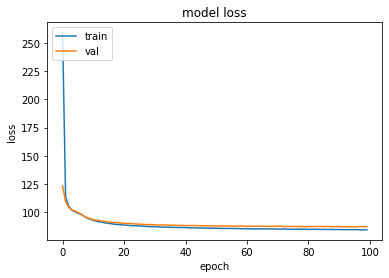

In [0]:
plt.plot(vae_vgg_vae_var_single.model.history.history['loss'])
plt.plot(vae_vgg_vae_var_single.model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Inference and Results

The model is now trained on the X_train data. To test the usefulness of the model on finding related basketball plays we run inference and subsequent analyses only of the test data - X_test.

We run and record inference over the test data using the `.add_predictions` method of the `ModelData` class. This method captures:

1. The predictions for (i) Train and (ii) Test data
  - (i) `.sample_data.X_hat_train` & (ii) `.sample_data.X_hat_test` - `SampleData` class
2. The latent space activiations for (i) Train and (ii) Test data
  - (i) `.sample_data.z_train` & (ii) `.sample_data.z_test` - `np.ndarray` class - shape: `(n_samples, latent_dim)`
3. The posterior probability of the latent space activations modelled as a latent_dim (dimensional) gaussian
  - (i) `.sample_data.z_train_prob` & (ii) `.sample_data.z_test_prob` - `np.ndarray` class - shape: `(n_samples, latent_dim)`
  
### Model Flow Sketch
<img src ='/files/tables/ae_model_flow.PNG' width='70%'>

In [0]:
if building_model_data:
  model_data.sample_data.add_predictions(vae_vgg_vae_var_single)
else:
  sample_data.add_predictions(vae_vgg_vae_var_single)

## Generate Candidate Sets

A candidate set is a set of plays that are close to each other in latent space. The aim of the AutoEncoder method is that if two plays are compressed in to the latent space, so that their most important features are preserved during reconstruction by the decoder - then an efficient coding of those plays in latent space will lead to neighbours in that space baring greater similarity to each other than those that are found to be distant.

<img src ='/files/tables/latent_space.PNG' width='70%'>

A means to validate this is to find sets of latent space activations `model_data.sample_data.z_test` that are close to each other and consider them to be a "candidate set" - the plays that caused these activations are likely to have important common features and thereby be similar plays.

The converse should also be true: plays that are found in different candidate sets are found to be at greater distance to each other than those found within the set. In the diagram above the orange dots would be found n the same "candidate set", but the yellow dot would be found in another set (its own set with its own distinct neighbours). This means that the plays found in different sets most likely won't be too similar in terms of play similarity.

The method to generate these candidate sets belongs to the `ModelData` class - `.get_candidates`. It required the dimensionality of the latent space to define an n-dim cube within the latent space and to draw at most 20 samples from spaced points on the surface of the cube. This ensures that the distance between "candidate sets" is much larger than the distances between members of a particular set.

In [0]:
if building_model_data:
  candidate_sets = model_data.sample_data.get_candidates(vae_vgg_vae_var_single.latent_dim)
else:
  candidate_sets = sample_data.get_candidates(vae_vgg_vae_var_single.latent_dim)

<command-4125874324571724>:49: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 rand_i = np.random.randint(0, total_coords, limit_coords, dtype=np.long)

In [0]:
candidate_sets

Out[48]: [{'grid_coords': array([[-0.3 , 15. , -0.3 , 0.3 , 15. , 0.3 , 0. , -0.3 , -0.15,
 0. , 0. , -0.15, -0.3 , 0. , 0. , 0. ]]),
 'cent_dx': 799,
 'cent_coods': array([-0.05572456, 0.11585552, -0.21168314, 0.24434914, 1.4346489 ,
 -0.01052768, -0.2734518 , 0.12941593, 0.05583566, -0.09903574,
 -0.2789935 , 0.10134804, 0.5261854 , 0.3494803 , 0.136508 ,
 -0.3026027 ], dtype=float32),
 'neigh_dx': array([606, 287, 699, 742, 910, 785, 644, 118, 36, 553]),
 'neigh_coords': array([[ 0.14493376, 0.14222883, 0.33708918, -0.25735903, 1.4398392 ,
 0.12593281, -0.38599628, -0.39643115, 0.03127823, 0.33199382,
 0.04903825, 0.84994733, 0.18989822, -0.11833964, -0.18976924,
 -0.20373596],
 [ 0.2678108 , 0.21051255, -0.3426261 , -0.05800061, 1.2195581 ,
 0.16589667, -0.25087285, -0.00806992, -0.44918862, 0.02714548,
 0.09891133, 0.04213814, 0.10390781, 0.7538724 , 0.01029526,
 -0.30982417],
 [ 0.5110743 , 0.48215246, -0.18870747, -0.1079151 , 0.8195461 ,
 0.36210656, -0.0216324 , -0.23758519, -0.07334837, 0.26093706,
 -0.17008235, 0.1281858 , -0.04104751, -0.2175058 , -0.0451849 ,
 -0.11431673],
 [-0.4890706 , 0.11783135, 0.15831073, -0.33462885, 1.1349878 ,
 -0.30854926, -0.2971401 , -0.34757084, -0.23443615, -0.04888735,
 -0.06671356, -0.08029464, 0.03220463, 0.13870254, -0.19710198,
 0.05817034],
 [ 0.05065528, 0.48291397, -0.15550096, 0.02343839, 0.74478495,
 -0.03076917, 0.276522 , 0.13578114, -0.17906593, -0.23693615,
 0.1695514 , -0.13295625, 0.28043714, -0.2678042 , -0.04096344,
 -0.12195779],
 [ 0.23203439, 0.94406927, 0.29757002, -0.6135256 , 0.39153284,
 -0.18357825, -1.15394 , 0.46158445, 0.23365289, 0.23671944,
 -0.16631757, -0.31479564, -0.0571687 , 0.14989036, -0.4622104 ,
 0.04741573],
 [ 0.24409302, 0.429084 , 0.41390803, -0.71608526, 0.84434456,
 -0.33276165, -0.49064243, -0.2371988 , 0.25238255, -0.0172373 ,
 0.09613752, -0.03653647, -0.33564287, 0.16063388, -0.3318976 ,
 -0.0310642 ],
 [-0.35800558, 0.33664292, -0.04838205, -0.47258663, 0.9629228 ,
 0.41080773, 0.08218013, -0.04971617, 0.26988393, 0.5004332 ,
 0.17490973, 0.7204954 , 0.8627381 , -0.28628027, -0.37864205,
 -0.09993901],
 [ 0.20838143, 0.6529032 , -0.76794785, -0.19295436, 0.57848746,
 -0.00741599, 0.02869074, 0.03658796, -0.45182648, -0.32270724,
 -0.5968393 , -0.2482988 , 0.10432833, -0.22605422, 0.17906702,
 -0.25909287],
 [ 0.41724366, 0.6959975 , -0.4705188 , -0.13043222, 0.53401595,
 -0.39625666, -0.18268761, 0.15857622, -0.14896896, 0.35733107,
 -0.63346475, -0.33131316, -0.03493693, -0.18283808, 0.03518777,
 0.295531 ]], dtype=float32)},
 {'grid_coords': array([[-0.3 , 15. , 15. , -0.15, 15. , 15. , -0.15, 0. , 0. ,
 -0.15, 0. , -0.15, 0. , 0. , 0.3 , 0.3 ]]),
 'cent_dx': 606,
 'cent_coods': array([ 0.14493376, 0.14222883, 0.33708918, -0.25735903, 1.4398392 ,
 0.12593281, -0.38599628, -0.39643115, 0.03127823, 0.33199382,
 0.04903825, 0.84994733, 0.18989822, -0.11833964, -0.18976924,
 -0.20373596], dtype=float32),
 'neigh_dx': array([118, 26, 212, 699, 648, 21, 492, 785, 338, 204]),
 'neigh_coords': array([[-0.35800558, 0.33664292, -0.04838205, -0.47258663, 0.9629228 ,
 0.41080773, 0.08218013, -0.04971617, 0.26988393, 0.5004332 ,
 0.17490973, 0.7204954 , 0.8627381 , -0.28628027, -0.37864205,
 -0.09993901],
 [ 0.10926742, 0.86122113, 0.3194149 , 0.27394247, 0.22070685,
 0.20938563, -0.27160317, -0.07633068, -0.41352284, -0.61257976,
 -0.7092046 , 0.5867137 , -0.02505466, 0.25052094, -0.45665154,
 0.23016971],
 [ 0.5544358 , 0.57930434, 0.12814647, -0.08295757, 0.3853251 ,
 0.43558553, -0.09896813, -0.09355575, -0.2910909 , 0.2389206 ,
 0.53035337, -0.23855418, 0.87275183, -0.0417479 , -0.19811067,
 -0.41280702],
 [ 0.5110743 , 0.48215246, -0.18870747, -0.1079151 , 0.8195461 ,
 0.36210656, -0.0216324 , -0.23758519, -0.07334837, 0.26093706,
 -0.17008235, 0.1281858 , -0.04104751, -0.2175058 , -0.0451849 ,
 -0.11431673],
 [-0.01331113, -0.11868625, 1.0613945 , -0.14495033, -0.1448219 ,
 0.6646296 , -0.13697524, 0.3543274 , 0.08089606, 0.19661656,
 -

## Data Inspection

The `Plotter` class is a utility to quickly generate plots to inspect the data. Examples in this section:

1. `plotter.plot_play_images()`
 - A method to plot a play as the 4 component heatmaps
2. `plotter.quick_pair_plot()`
 - A method to plot a heatmap against its reconstructed counterpart
3. `plotter.plot_latent_example()`
4. `plotter.plot_closest_plays()`
5. `plotter.plot_candidates()`

In [0]:
class Plotter(ModelData):
  
  #TODO: When satisfied with how this works, this needs to be moved to the model_data class
  '''
  A class to provide plotting and graphing functions for a dataset

  ...

  Attributes
  ----------
  - inherits from SampleData
  - Addtionally:
    - image_size - used to resize heatmaps to (n,n) for plotting
  
  Methods
  -------
   - get_nearest_index - Utility to find the row-index of the closest coordinates in latent space (nearest-neighbour)
   - quick_pair_plot - Plot a heatmap against its reconstructed counterpart (wrapper)
   - plot_reconstruction - Plot a heatmap against its reconstructed counterpart (main code for plotting)
   - plot_play_images - Plot a play as 4 component heatmaps
   - plot_latent_example - Plot a play as its coordinates in latent space relative to the cloud of other plays
   - plot_candidates - Plot a central play as 4 component heatmaps and the heatmaps of similar plays
  '''
  def __init__(self, model_data):
    self.__dict__ = model_data.sample_data.__dict__
    self.image_size = model_data.image_size

  @staticmethod
  def get_nearest_index(latent_mean, index):
    latent_distance = ((latent_mean - latent_mean[index,:]) ** 2 ).sum(1)
    return np.argsort(latent_distance)[1]
  
  @staticmethod
  def get_nearest_n_index(latent_mean, index, n):
    latent_distance = ((latent_mean - latent_mean[index,:]) ** 2 ).sum(1)
    return np.argsort(latent_distance)[1:n]
    
  def quick_pair_plot(self, heatmap_name='position', index=None): #NEED
    
    if not index:
      index = self.X_test.get_random_index(index)
    
    original_image = self.X_test[heatmap_name][index].reshape(28,28)
    reconstructed_image = self.X_hat_test[heatmap_name][index].reshape(28,28)
    
    self.plot_reconstruction(original_image, reconstructed_image)
    
  def subplot(self, panel_coords, image, t_str):
    plt.subplot(*panel_coords)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(t_str)
    
  def plot_reconstruction(self, original_image, reconstructed_image, timeseries=None):
    '''
    A function to get, shape and return Mnist data for testing

    Parameters
    ----------
    Arguments:
     - original_image - [n,n] matrix of the image used as input for the network
     - reconstructed_image - [n,n] matrix of the image produced as output from the network's predict method
    Keyword arguments:
     - timeseries -- (default=None) additional time series to plot as the third subplot

    Returns
    ----------
    No Return
    '''

    num_plots = 2 if timeseries is None else 3

    plt.figure(num=None, figsize=(8, 4), dpi=120, facecolor='w', edgecolor='k')

    self.subplot((1,num_plots,1), original_image, "Original Heatmap")
    self.subplot((1,num_plots,2), reconstructed_image, "Reconstructed Heatmap")

    if timeseries is not None:
      plt.subplot(1,num_plots,3)
      plt.plot(timeseries[0], linewidth=18)
      plt.plot(timeseries[1], linewidth=4, linestyle=':')
      plt.title("Timeseries")

    #_ = plt.suptitle("Colour Groups From Properties")
    plt.show()
    
  def plot_play_images(self, index=None): #NEED
    
    if not index:
      index = self.X_test.get_random_index(index)
      
    plt.figure(num=None, figsize=(16, 4), dpi=240, facecolor='w', edgecolor='k')
    for k, col_name in enumerate(self.col_names):
      self.subplot((1,5,k+1), self.X_test[col_name][index].reshape(self.image_size), col_name)

    row_title = self.X_test_labels.GameLabels.get_row_title(index)
    
    plt.suptitle(row_title)
    
  def plot_latent_example(self, index=None):
    
    index = self.X_test.get_random_index(index)
    
    latent_mean = self.z_test
    latent_prob = self.z_test_prob
    closest_index = self.get_nearest_index(latent_mean, index)

    plt.figure(num=None, figsize=(16, 4), dpi=240, facecolor='w', edgecolor='k')
    for k, dxs in enumerate([[0,1], [0,2], [1,2]]):
      i, j = dxs
      plt.subplot(1,3,k+1)
      
      plt.scatter(latent_mean[:, i], latent_mean[:, j], s=1, c=latent_prob)
      plt.scatter(latent_mean[index, i], latent_mean[index, j], s=60)
      plt.scatter(latent_mean[closest_index, i], latent_mean[closest_index, j], s=60)
      
      plt.xticks([])
      plt.yticks([])
      plt.title(f"Latent-D: {i}-{j}")
      
    plt.suptitle(f"Sample Probability: {latent_prob[index]:.2}")
    
  def plot_closest_plays(self, index=None):
    
    index = self.X_test.get_random_index(index)
    print(self.z_test)
    print(index)

    closest_index = self.get_nearest_index(self.z_test, index)
    
    print(closest_index)
    
    plt.figure(num=None, figsize=(16, 12), dpi=240, facecolor='w', edgecolor='k')
    for j, col_name in enumerate(self.col_names):
      self.subplot((3,4,j+1), self.X_test[col_name][index,:].reshape(28,28), f"Original {col_name}")
      self.subplot((3,4,j+1+4), self.X_test[col_name][closest_index,:].reshape(28,28), f"Closest Match {col_name}")
      self.subplot((3,4,j+1+2*4), self.X_hat_test[col_name][index,:].reshape(28,28), f"Reconstructed {col_name}")

    title_str = self.X_test_labels.GameLabels.get_row_title(index, title='Original') + '\n' + \
                self.X_test_labels.GameLabels.get_row_title(closest_index, title='Matches')
    plt.suptitle(title_str)
    
  def plot_closest_n_plays(self, n, index=None):
    
    index = self.X_test.get_random_index(index)

    #print(self.z_test)
    print(index)
    #print(n)
    
    closest_index = self.get_nearest_n_index(self.z_test, index, n)
    
    
    print(closest_index)
      
    plt.figure(num=None, figsize=(16, 12), dpi=240, facecolor='w', edgecolor='k')
    for i, ii in enumerate(closest_index):
      for j, col_name in enumerate(self.col_names):
        if i == 0:
          self.subplot((1 + len(closest_index),4,i+j+1), self.X_test[col_name][index,:].reshape(28,28), f"Original {col_name}")
        self.subplot((1 + len(closest_index), 4, i*4+j+1+4), self.X_test[col_name][ii,:].reshape(28,28), f"Rank {i + 1} closest {col_name}")
        #self.subplot((3,4,i+j+1+2*4), self.X_hat_test[col_name][index,:].reshape(28,28), f"Reconstructed {col_name}")

    title_str = self.X_test_labels.GameLabels.get_row_title(index, title='Original')
    for i, ii in enumerate(closest_index):
      title_str = title_str + '\n' + self.X_test_labels.GameLabels.get_row_title(ii, title=f'Rank {i}')
    #plt.suptitle(title_str)
    
    #print(title_str)
    
  def get_n_closest_plays(self, n, index=None, writeout = False, tag = None):  #NEED
    
    index = self.X_test.get_random_index(index)

    #print(self.z_test)
    print(index)
    #print(n)
    
    closest_index = self.get_nearest_n_index(self.z_test, index, n)
    
    
    print(closest_index)
    
    temp_df = X_test_labels.loc[np.append(index, closest_index), :].copy(deep = True)
    temp_df.loc[:, 'rank'] = np.arange(0, len(closest_index) + 1)
    
    if writeout:
      if tag:
        write_to = f'default.{experiment_name}' + '_' + str(index) + '_' + tag
      else:
        write_to = f'default.{experiment_name}' + '_' + str(index)
      print(f'Writing out table to: {write_to}')
      spark.createDataFrame(temp_df.loc[:, np.append('rank', X_test_labels.columns)]).write.mode("overwrite").saveAsTable(write_to)
    
    return temp_df.loc[:, np.append('rank', X_test_labels.columns)]
      
    

  def plot_candidates(self, candidate_set, save_path=None):
    '''
    Creates a figure to compare the heatmaps of similar plays
    '''
    def print_label(data_index, panel_index):
      '''
      Utility to plot the game information in the right-most panel of each row of the candidates figure
      '''
      t_str = self.X_test_labels.GameLabels.get_row_title(data_index, long=False)
      plt.subplot(11, 5, panel_index)
      plt.text(0, 0, t_str)
      plt.axis("off")
      
    fig = plt.figure(num=None, figsize=(14, 32), dpi=240, facecolor='w', edgecolor='k')
    for j, col_name in enumerate(self.col_names):
      self.subplot((11, 5, j+1), self.X_test[col_name][candidate_set["cent_dx"],:].reshape(self.image_size), f"Center {col_name}")
      print_label(candidate_set["cent_dx"], 5)

      for k, n_dx in enumerate(candidate_set['neigh_dx']):
        ki = k+1
        self.subplot((11, 5, j+1+5*ki), self.X_test[col_name][n_dx,:].reshape(self.image_size), f"Neighbour {ki} - {col_name}")
        if j == 3:
          print_label(n_dx, ki*5+5)

    plt.suptitle(f"Latent Coords Of Center: {candidate_set['grid_coords']}", y=0.9)

    if save_path:
      #f"/dbfs/FileStore/gb-cache/experiments/{settings['experiment_name']}/{settings['model_name']}/candidates/candidates_{q}.png"
      fig.savefig(save_path)
      
  def print_labels(self, n):
    print(self.X_test_labels.shape)
    for i in np.arange(0,n):
      print(self.X_test_labels.GameLabels.get_row_labels(i))
      
    return self.X_test_labels.GameLabels.get_row_labels(i)
  
  def find_index(self, gameId, divider_id):
    for i in np.arange(0, self.X_test_labels.shape[0]):
      if (self.X_test_labels.GameLabels.get_row_labels(i).gameId == gameId):
        if (self.X_test_labels.GameLabels.get_row_labels(i).dividerId == divider_id):
          print('index found in TEST: {}'.format(i))
          print(self.X_test_labels.GameLabels.get_row_labels(i))
          return i
    
    for i in np.arange(0, self.X_train_labels.shape[0]):
      if (self.X_train_labels.GameLabels.get_row_labels(i).gameId == gameId):
        if (self.X_train_labels.GameLabels.get_row_labels(i).dividerId == divider_id):
          print('index found in TRAIN: {}'.format(i))
          print(self.X_train_labels.GameLabels.get_row_labels(i))
          return None
    
        
    return None
  
  def temp_build_matrix(self, n):
    gameIds = []
    dividerIds = []
    periods = []
    gcstarts = []
    gcends = []
    for i in np.arange(0,n):
      gameId = self.X_test_labels.GameLabels.get_row_labels(i).gameId
      dividerId = self.X_test_labels.GameLabels.get_row_labels(i).dividerId
      gcstart = self.X_test_labels.GameLabels.get_row_labels(i).startGcTime    
      gcend = self.X_test_labels.GameLabels.get_row_labels(i).endGcTime
      period = self.X_test_labels.GameLabels.get_row_labels(i).period
      gameIds = gameIds + [gameId]
      dividerIds = dividerIds + [dividerId]
      periods = periods + [period]
      gcstarts = gcstarts + [gcstart]
      gcends = gcends + [gcend]
      
    return gameIds, dividerIds, periods, gcstarts, gcends
    
    

In [0]:
@pd.api.extensions.register_dataframe_accessor("GameLabels")
class GameLabels:
  
  def __init__(self, pandas_obj):
    

    #TODO: Mrinal, the below has been commented out because 'teamName' and 'denfenceName' are missing in the case of 
    self.label_cols = ['gameId', 'dividerId', 'teamId', 'teamName', 'defenceName', 'startGcTime', 'endGcTime', 'startWcTime', 'endWcTime', 'period']

    
    self.required_cols = ['gameId', 'teamId', 'startWcTime', 'endWcTime', 'startGcTime', 'endGcTime', 'period']
    self._validate(pandas_obj)
    self._obj = pandas_obj

  def _validate(self, obj):
    # verify there is a column latitude and a column longitude
    for col_name in self.required_cols:
      if col_name not in obj.columns:
        raise AttributeError(f"Must have '{col_name}'.")
      
  def complete_labels(self, maps):
    self._obj["teamName"] = self._obj["teamId"].apply(lambda team_id: maps['team_name_mapping_dict'][team_id])
    self._obj["defenceName"] = self._obj.apply(\
                                 lambda row: [ maps['team_name_mapping_dict'][x] 
                                                 for x in maps['game_mapping_dict'][row['gameId']] 
                                                 if x != row['teamId']][0], axis=1 )
    
    #self._obj["startWcTime"] = self._obj["startWcTime"].astype(int).apply(lambda x: f"{x//60:02d}:{x%60:02d}")
    #self._obj["endWcTime"] = self._obj["endWcTime"].astype(int).apply(lambda x: f"{x//60:02d}:{x%60:02d}")
    
    self._obj["startGcTime"] = self._obj["startGcTime"].astype(int).apply(lambda x: f"{x//60:02d}:{x%60:02d}")
    self._obj["endGcTime"] = self._obj["endGcTime"].astype(int).apply(lambda x: f"{x//60:02d}:{x%60:02d}")
      
  def get_row_labels(self, index):
    return self._obj.loc[index, self.label_cols]
  
  def get_row_labels_alt(self, index, cols):
    return self._obj.loc[index, cols]

  def get_row_title(self, index, title='Original', long=True):
    
    game_id, dividerId, team_id, team_name, defence_name, gc_start_time, gc_end_time, wc_start_time, wc_end_time, period = self.get_row_labels(index)
    
    if long:
      return \
      f'''{title} GameId: {game_id}; DividerId: {dividerId}, TeamId: {team_name} [hp] vs {defence_name}
      Time (P-{period}): {gc_start_time} - {gc_end_time}'''
    else:
      r_str = f"GameId: {game_id}\nDividerId: {dividerId}\nOffence: {team_name}\nDefence: {defence_name}\nPeriod {period}\n"
      r_str += f"Start GC: {gc_start_time}\nEnd GC: {gc_end_time}"
      return r_str

<command-3485636131648725>:2: UserWarning: registration of accessor <class '__main__.GameLabels'> under name 'GameLabels' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
 class GameLabels:

In [0]:
find_index(gameId = '0022000085', divider_id = 307, X_test_labels = X_test_labels, X_train_labels = X_train_labels)

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3485636131648742> in <module> 
 ----> 1 find_index ( gameId = '0022000085' , divider_id = 307 , X_test_labels = X_test_labels , X_train_labels = X_train_labels ) 

 NameError : name 'find_index' is not defined

### TODO FOR MRINAL:  if the plots below are showing with the basked at the bottom of the image, verify that the coordinates are correct from the court perspective, if so then just change how the plotter plots the heatmap so the basket is at the top.  TO REITERATE: double check FIRST that the x and y coordinates in the data, in the heatmaps, match video feed, and that the heatmaps aren't getting inverted.   Once that is VERIFIED, then you know it's just a plotter issue.

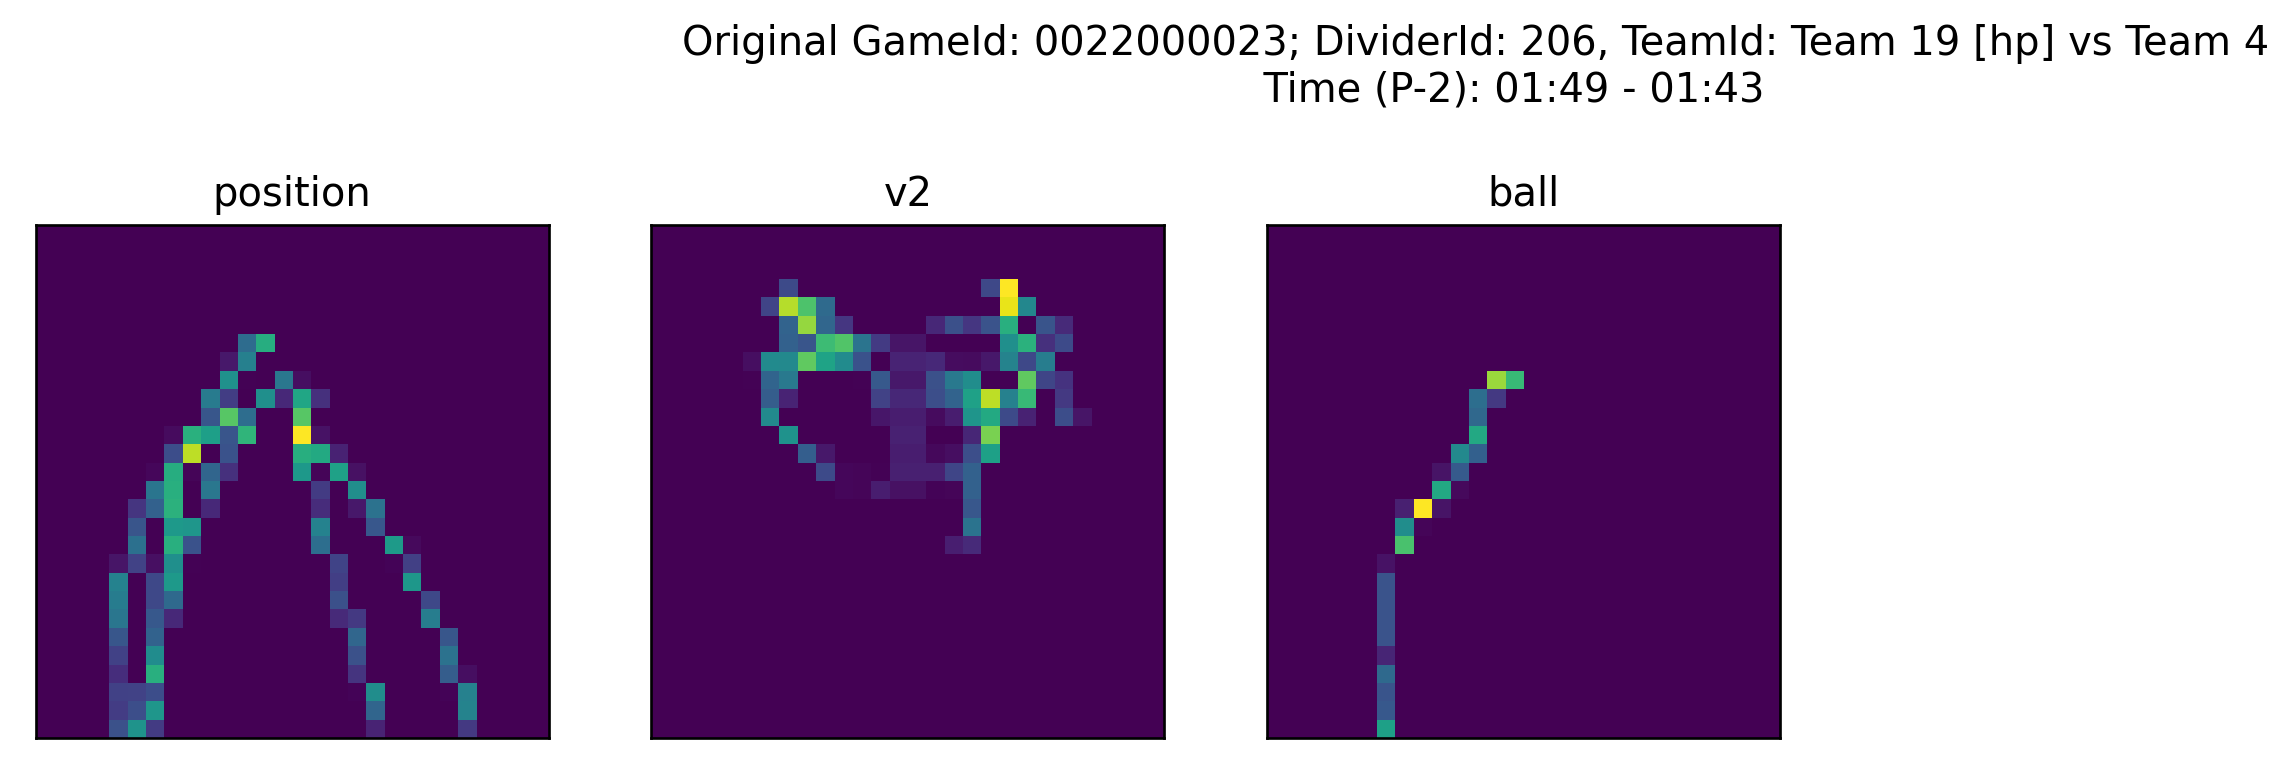

In [0]:
if building_model_data:
  plotter = Plotter(model_data)
  plotter.plot_play_images(index = 13)
else:
  plot_play_images(image_size, index = 13)

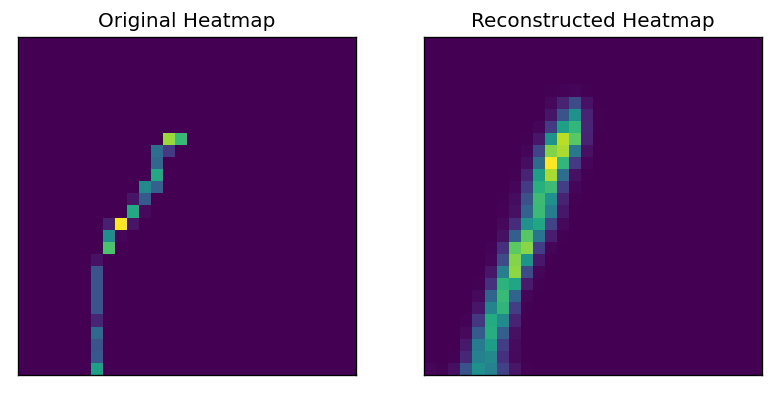

In [0]:
plotter.quick_pair_plot(heatmap_name='ball', index = 13)

13
[505]

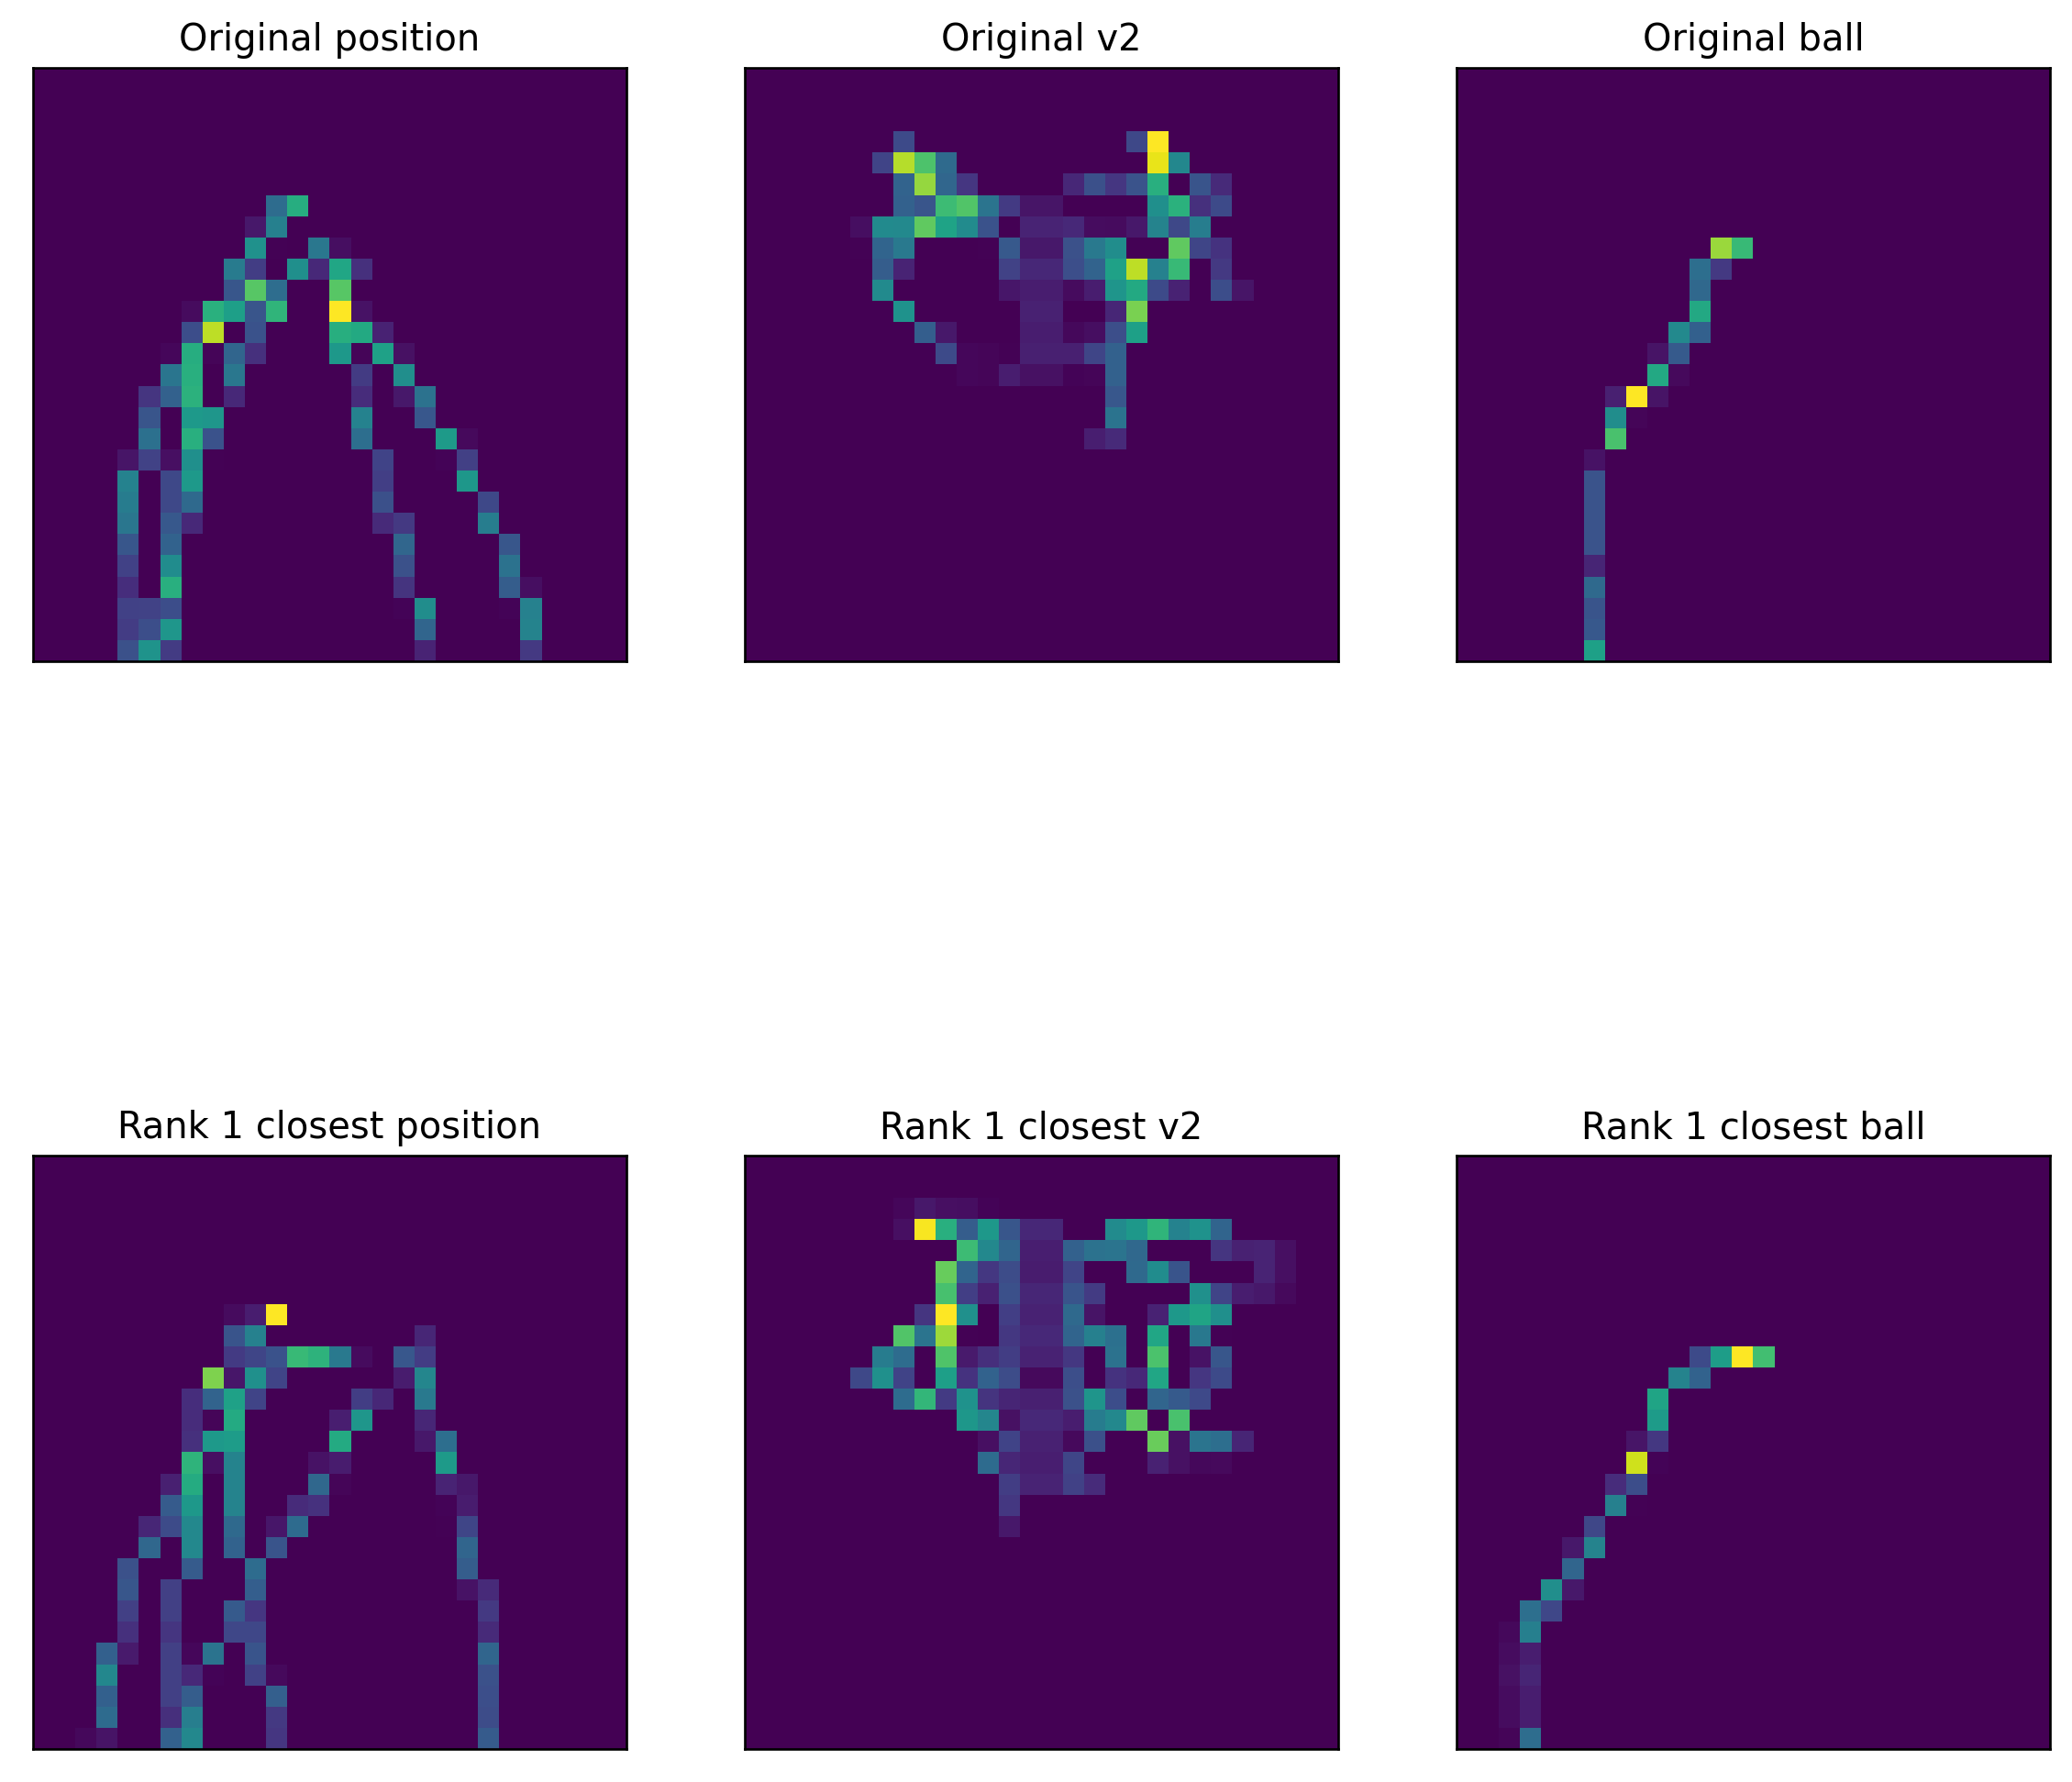

In [0]:
plotter.plot_closest_n_plays(2, index=13)

## Setting seed plays, or finding them, and then writing out similarity lists

In [0]:
plotter.get_n_closest_plays(20, index = 13 , writeout = True)

13
[505 815 243 946 933 291 651 888 508 864 674 834 283 528 808 835 959 720
 670]
Writing out table to: default.full_results0620_13
Out[54]:

,rank,gameId,dividerId,teamId,startWcTime,endWcTime,startGcTime,endGcTime,period,teamName,defenceName
13,0,0022000023,206,1610612765,1609031176052,1609031181452,01:49,01:43,2,Team 19,Team 4
505,1,0022000023,211,1610612765,1609031246812,1609031253092,01:17,01:11,2,Team 19,Team 4
815,2,0022000165,271,1610612765,1610587845392,1610587850392,06:26,06:21,3,Team 19,Team 5
243,3,0022000984,325,1610612765,1620175684159,1620175689199,02:03,01:58,3,Team 19,Team 15
946,4,0022000165,343,1610612765,1610588998032,1610589005272,11:01,10:54,4,Team 19,Team 5
933,5,0022000984,146,1610612765,1620172343359,1620172350959,09:24,09:17,2,Team 19,Team 15
291,6,0022000230,261,1610612745,1611365351282,1611365359282,09:39,09:31,3,Team 25,Team 19
651,7,0022000984,74,1610612766,1620170800359,1620170805039,04:21,04:16,1,Team 15,Team 19
888,8,0022000165,434,1610612765,1610590474352,1610590480432,00:39,00:32,4,Team 19,Team 5
508,9,0022000041,103,1610612737,1609203958254,1609203963534,11:42,11:37,2,Team 1,Team 19
